$20^{th}$ Apr 2021

In [1]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [ ]:
'sequence_name', 'clade', 'lineage', 'genome_coverage'


In [18]:
df_seq_summ = pd.read_excel('/home/douso/SarsGenomics/QCstats.Analysis_OUSO_13-08-2021.xlsx', 
                   usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], sheet_name='summary')

In [4]:
df_seq_summ.head()

,sequence_name,clade,lineage,genome_coverage
0,COCV11310,20C,B.1,59.3
1,COVC00854,20C,B.1,94.9
2,COVC00867,20C,B.1.446,68.2
3,COVC00893,20C,B.1.446,84.1
4,COVC00915,NaN,Unkown,0.0


In [11]:
df_seq_summ.shape

(711, 4)

In [ ]:
df_metadata = pd.read_excel('/home/douso/Documents/TrendData/Results/ResultsMerged/COVID19-results-merged-cln.xlsx',
                           usecols=['S_NUM', 'AGE_YRS', 'COUNT_RES', 'DT_CONF'])

In [8]:
df_metadata.head()

,S_NUM,AGE_YRS,COUNT_RES,DT_CONF
0,COVC00001,35.0,Garissa,2020-06-02 00:00:00
1,COVC00002,29.0,Garissa,2020-06-02 00:00:00
2,COVC00003,50.0,Garissa,2020-06-02 00:00:00
3,COVC00004,35.0,Garissa,2020-06-02 00:00:00
4,COVC00005,27.0,Garissa,2020-06-02 00:00:00


In [19]:
df_metadata_sub = df_metadata[df_metadata['S_NUM'].isin(list(df_seq_summ['sequence_name']))]

In [20]:
df_metadata_sub.shape

(610, 4)

In [12]:
df_metadata[df_metadata['S_NUM'].str.contains('_')]

,S_NUM,AGE_YRS,COUNT_RES,DT_CONF


In [21]:
df_sub = df_seq_summ[df_seq_summ['sequence_name'].isin(list(df_metadata['S_NUM'])) == False]

In [22]:
list(df_sub['sequence_name'])

['COCV11310',
 'COVC1849',
 'COVC22135b',
 'KEMRI-1',
 'KEMRI-10',
 'KEMRI-11',
 'KEMRI-12',
 'KEMRI-2',
 'KEMRI-3',
 'KEMRI-4',
 'KEMRI-5',
 'KEMRI-6',
 'KEMRI-7',
 'KEMRI-8',
 'KEMRI-9',
 'MoH-Cov-1',
 'MoH-Cov-2',
 'MoH-Cov-3',
 'MoH-Cov-4',
 'MoH-Cov-5',
 'MoH-Cov-6',
 'NHRL-SS001',
 'NHRL-SS002',
 'NHRL-SS003',
 'NHRL-SS004',
 'NHRL-SS005',
 'NHRL-SS006',
 'NHRL-SS007',
 'NHRL-SS008',
 'NHRL-SS009',
 'NHRL-SS010',
 'NHRL-SS011',
 'NHRL-SS012',
 'NHRL-SS013',
 'NHRL-SS014',
 'NHRL-SS015',
 'NHRL-SS016',
 'NHRL-SS017',
 'NHRL-SS018',
 'NHRL-SS019',
 'NHRL-SS020',
 'NHRL-SS021',
 'NHRL-SS022',
 'NHRL-SS023',
 'NHRL-SS024',
 'NHRL-SS025',
 'NHRL-SS026',
 'NHRL-SS027',
 'NHRL-SS028',
 'NHRL-SS029',
 'NHRL-SS030',
 'NHRL-SS031',
 'NHRL-SS032',
 'NHRL-SS033',
 'NHRL-SS034',
 'NHRL-SS035',
 'NHRL-SS036',
 'NHRL-SS037',
 'NPHL-12761',
 'NPHL-12780',
 'NPHL-12756',
 'NPHL-12762',
 'NPHL-12773',
 'NPHL1',
 'NPHL2',
 'NPHL3',
 'NPHL4',
 'Sample57_S57']

In [42]:
df_tseries0 = df_tseries[df_tseries['RESULT'] == 'Positive']
df_tseries1 = df_tseries[df_tseries['RESULT'] == 'Negative']

In [43]:
df_tseries0.tail()

,SAMPLE_NUMBER,GENDER_(M/F),COUNTY_OF_RESIDENCE,RESULT
LAB_CONFIRMATION_DATE,,,,
2021-04-01,COVC23752,M,Nairobi,Positive
2021-04-01,COVC23753,M,Nairobi,Positive
2021-04-07,COVC23754,M,Nairobi,Positive
2021-04-09,COVC23766,M,Nairobi,Positive
2021-04-15,COVC23781,F,Nairobi,Positive


In [44]:
df_tseries1.tail()

,SAMPLE_NUMBER,GENDER_(M/F),COUNTY_OF_RESIDENCE,RESULT
LAB_CONFIRMATION_DATE,,,,
2021-04-13,COVC23779,F,Nairobi,Negative
2021-04-13,COVC23780,F,Nairobi,Negative
2021-04-21,COVC23782,F,Nairobi,Negative
2021-04-21,COVC23783,F,Kiambu,Negative
2021-04-21,COVC23784,F,Nairobi,Negative


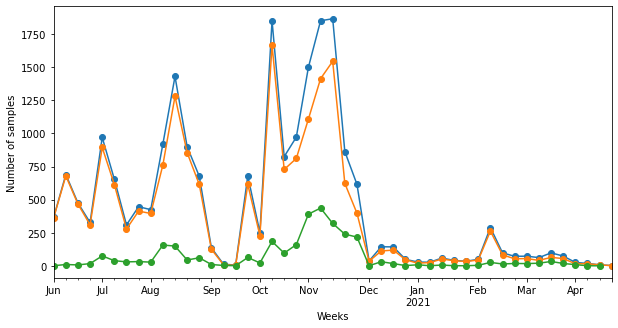

<Figure size 432x288 with 0 Axes>

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))

tests = df_tseries['RESULT'].resample('W').count()
pos = df_tseries0['RESULT'].resample('W').count()
neg = df_tseries1['RESULT'].resample('W').count()

tests.plot(ax=ax, marker='o', linestyle='-', label='tests')
neg.plot(ax=ax, marker='o', linestyle='-', label='negaives')
pos.plot(ax=ax, marker='o', linestyle='-', label='positives')

plt.xlabel('Weeks')
plt.ylabel('Number of samples')
# plt.legend()
plt.show()
plt.tight_layout()
fig.savefig('/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-line.png')

In [46]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

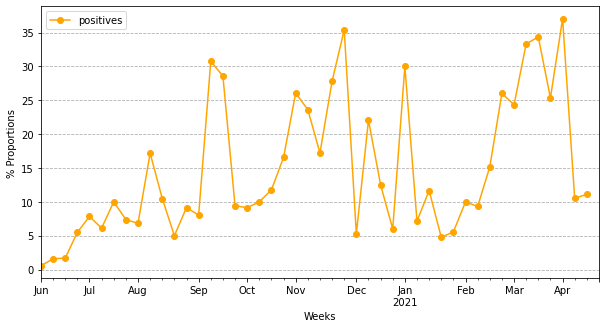

<Figure size 432x288 with 0 Axes>

In [47]:
# %matplotlib widget
fig, ax = plt.subplots(figsize=(10, 5))

tests = df_tseries['RESULT'].resample('W').count()
pos = df_tseries0['RESULT'].resample('W').count()
neg = df_tseries1['RESULT'].resample('W').count()

prop_pos = pos / tests * 100
prop_neg = neg / tests * 100

prop_pos.plot(ax=ax, marker='o', linestyle='-', label='positives', color='orange')
# prop_neg.plot(ax=ax, marker='o', linestyle='-', label='negatives', color='green')
# ax.plot(neg, style="-o", label='positives')
# ax.plot(pos, style="-o", label='negaives')

#plt.ioff()
plt.xlabel('Weeks')
plt.ylabel('% Proportions')
plt.legend()
plt.xticks()
plt.grid(axis='y', ls='--')
plt.show()
plt.tight_layout()
fig.savefig('/home/douso/Documents/TrendData/plots/draft_cov-pro+_trends_plot-line.png')

In [250]:
index = np.array(pos.index)

In [252]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
 
# Dataset
x=np.arange(46)
y=np.array(list(prop_pos)[:-1])

start = pd.Timestamp(index[0])
end = pd.Timestamp(index[-1])

t = np.linspace(start.value, end.value, 23)

cubic_interploation_model = interp1d(t, y, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(t.min(), t.max(), 5000)
Y_=cubic_interploation_model(X_)
 
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

ValueError: x and y arrays must be equal in length along interpolation axis.

46 46 46


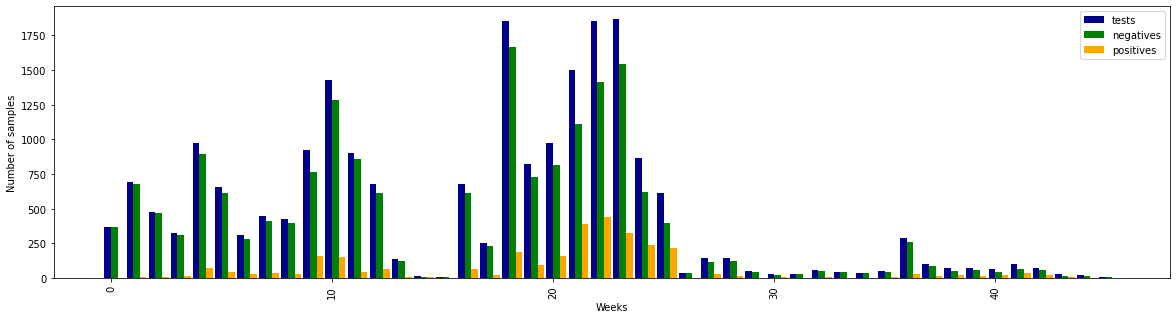

<Figure size 432x288 with 0 Axes>

In [52]:
x = np.arange(len(df_tseries0['RESULT'].resample('W').count()))
width = 0.3

fig, ax = plt.subplots(figsize=(20, 5))

tests = df_tseries['RESULT'].resample('W').count()[:-1]
pos = df_tseries0['RESULT'].resample('W').count()
neg = df_tseries1['RESULT'].resample('W').count()[:-1]
print(len(tests), len(pos), len(neg))

# xticks = [i.strftime(format='%d-%m-%y') for i in tests.index]

rec1 = ax.bar(x - width/2, tests, width=width, color='darkblue', label='tests', align='center')
rec2 = ax.bar(x + width/2, neg, width=width, color='green', label='negatives', align='center')
rec3 = ax.bar(x + width*3/2, pos, width=width, color='orange', label='positives', align='center')

plt.xlabel('Weeks')
plt.xticks(rotation=90)
plt.ylabel('Number of samples')
plt.legend()
plt.show()
plt.tight_layout()
fig.savefig('/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-bar.png')

46 46 46


<ipython-input-53-53b6cec1a15e>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)


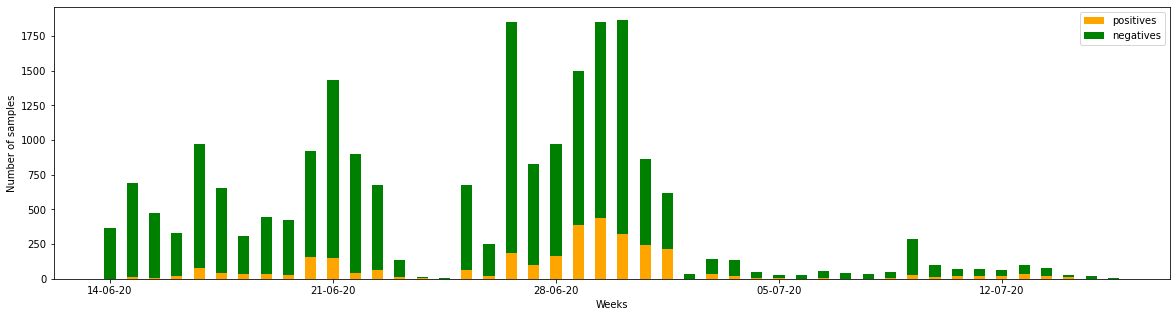

<Figure size 432x288 with 0 Axes>

In [53]:
x = np.arange(len(df_tseries0['RESULT'].resample('W').count()))
width = 0.5

fig, ax = plt.subplots(figsize=(20, 5))

tests = df_tseries['RESULT'].resample('W').count()[:-1]
pos = df_tseries0['RESULT'].resample('W').count()
neg = df_tseries1['RESULT'].resample('W').count()[:-1]
print(len(tests), len(pos), len(neg))

xticks = [i.strftime(format='%d-%m-%y') for i in tests.index]

ax.bar(x, pos, width=width, color='orange', label='positives', align='center')
ax.bar(x, neg, width=width, color='green', bottom=pos, label='negatives', align='center')
#ax.bar(x, tests, width=width, color='darkblue', bottom=neg, label='tests', align='center')

ax.set_xticklabels(xticks)
plt.xlabel('Weeks')
plt.xticks()
plt.ylabel('Number of samples')
plt.legend()
plt.show()
plt.tight_layout()
fig.savefig('/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-stacked.png')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(-100.0, 0, '(2021-01-09 00:00:00, Negative)'),
  Text(0.0, 0, '(2020-06-02 00:00:00, Negative)'),
  Text(100.0, 0, '(2020-08-24 00:00:00, Negative)'),
  Text(200.0, 0, '(2020-10-27 00:00:00, Negative)'),
  Text(300.0, 0, '(2020-12-29 00:00:00, Negative)'),
  Text(400.0, 0, '(2021-03-25 00:00:00, Positive)'),
  Text(500.0, 0, '')])

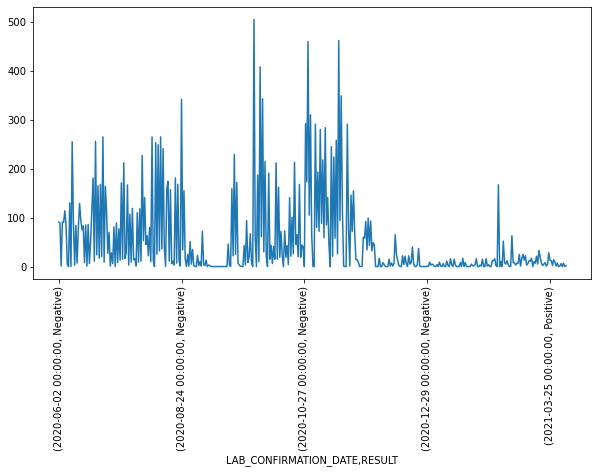

In [54]:
g = df_tseries.groupby(pd.Grouper(freq='D'))['RESULT'].value_counts().plot(figsize=(10, 5))
plt.xticks(rotation=90)

In [55]:
g

<AxesSubplot:xlabel='LAB_CONFIRMATION_DATE,RESULT'>

### Lineages trend

In [279]:
df1 = (pd.read_table('/home/douso/Insync/D.Ouso@cgiar.org/OneDrive Biz/\
sequencing_metadata/processed/seq-metadata-SM001.csv', parse_dates=True)
       [['Sequence_name', 'Lineage', 'Lab_confirmation_date']])

In [265]:
df2 = (pd.read_table('/home/douso/Insync/D.Ouso@cgiar.org/OneDrive Biz/\
sequencing_metadata/processed/seq-metadata0-SM002.tsv')
[['Sequence_name','Lineage', 'Lab_confirmation_date']])

In [280]:
dff1 = (df1.assign(Lab_confirmation_date = df1['Lab_confirmation_date']
                               .apply(lambda x: pd.Timestamp(x))))

In [267]:
dff2 = (df2.assign(Lab_confirmation_date = df2['Lab_confirmation_date']
                               .apply(lambda x: pd.Timestamp(x))))

In [269]:
dff2

,Sequence_name,Lineage,Lab_confirmation_date
0,COVC20827,B.1,2020-11-13
1,COVC20838,B.1.1.171,2020-11-13
2,COVC20862,B.1.549,2020-11-13
3,COVC20860,B.1,2020-11-13
4,COVC20864,B.1,2020-11-13
5,COVC20846,B.1,2020-11-13
6,COVC20856,B.1.343,2020-11-13
7,COVC23313,B.1.1.7,2021-02-19
8,COVC23353,B.1.1.7,2021-02-22
9,NPHL3,B.1.1.7,2021-04-08


In [281]:
dff1

,Sequence_name,Lineage,Lab_confirmation_date
0,COVC21058,B.1,2020-11-16
1,COVC21059,B.1.596.1,2020-11-16
2,COVC21060,B.1.549,2020-11-16
3,COVC21062,B.1.143,2020-11-16
4,COVC23001,B.1.1.7,2021-09-02
5,COVC23002,B.1.1.7,2021-09-02
6,COVC23201,B.1.351,2021-02-13
7,COVC23206,B.1.525,2021-02-13
8,COVC23264,B.1,2021-02-17
9,COVC23267,B.1.1.7,2021-02-17


In [282]:
df_lin = dff1.append(dff2, ignore_index=True, verify_integrity=True)

In [108]:
df_lin_cln = df_lin[df_lin['Lab_confirmation_date'].notna()]

In [294]:
df_lin

,Sequence_name,Lineage,Lab_confirmation_date
0,COVC21058,B.1,2020-11-16
1,COVC21059,B.1.596.1,2020-11-16
2,COVC21060,B.1.549,2020-11-16
3,COVC21062,B.1.143,2020-11-16
4,COVC23001,B.1.1.7,2021-09-02
5,COVC23002,B.1.1.7,2021-09-02
6,COVC23201,B.1.351,2021-02-13
7,COVC23206,B.1.525,2021-02-13
8,COVC23264,B.1,2021-02-17
9,COVC23267,B.1.1.7,2021-02-17


In [295]:
df_lin_ts = (df_lin.sort_values('Lab_confirmation_date'))
#              .groupby('Lineage'))
#              .set_index('Lineage'))


In [298]:
df_lin_ts['Sequence_name'].nunique()

59

In [299]:
df_lin_ts2 = df_lin_ts[df_lin_ts['Lab_confirmation_date'] != '2021-09-02']

In [300]:
df_lin_ts2['Sequence_name'].nunique()

57

In [301]:
df_lin_grpby_lb_l = df_lin_ts2.groupby(['Lab_confirmation_date', 'Lineage']).count()

In [289]:
ticks

[Timestamp('2020-11-13 00:00:00'),
 Timestamp('2020-11-13 00:00:00'),
 Timestamp('2020-11-13 00:00:00'),
 Timestamp('2020-11-13 00:00:00'),
 Timestamp('2020-11-13 00:00:00'),
 Timestamp('2020-11-16 00:00:00'),
 Timestamp('2020-11-16 00:00:00'),
 Timestamp('2020-11-16 00:00:00'),
 Timestamp('2020-11-16 00:00:00'),
 Timestamp('2021-02-03 00:00:00'),
 Timestamp('2021-02-03 00:00:00'),
 Timestamp('2021-02-03 00:00:00'),
 Timestamp('2021-02-03 00:00:00'),
 Timestamp('2021-02-13 00:00:00'),
 Timestamp('2021-02-13 00:00:00'),
 Timestamp('2021-02-17 00:00:00'),
 Timestamp('2021-02-17 00:00:00'),
 Timestamp('2021-02-18 00:00:00'),
 Timestamp('2021-02-19 00:00:00'),
 Timestamp('2021-02-19 00:00:00'),
 Timestamp('2021-02-22 00:00:00'),
 Timestamp('2021-02-22 00:00:00'),
 Timestamp('2021-02-24 00:00:00'),
 Timestamp('2021-02-24 00:00:00'),
 Timestamp('2021-02-24 00:00:00')]

In [303]:
df_lin_grpby_lb_l

Sequence_name
Lab_confirmation_date Lineage                 
2020-11-13            B.1                   12
                      B.1.1.171              1
                      B.1.343                1
                      B.1.530                2
                      B.1.549                2
2020-11-16            B.1                    2
                      B.1.143                1
                      B.1.549                1
                      B.1.596.1              1
2021-01-04            A.23.1                 1
                      B.1.1.7                1
                      B.1.530                1
2021-02-03            A.23                   1
                      B.1.1.7                8
                      B.1.351                1
                      B.1.525                2
2021-02-13            B.1.351                1
                      B.1.525                1
2021-02-17            B.1                    1
                      B.1.1.7                1
2021-02-18            B.1.1.7                1
2021-02-19            B.1.1.7                2
                      B.1.525                1
2021-02-22            A.23.1                 1
                      B.1.1.7                3
2021-02-24            A.23.1                 1
                      B.1.1.7                1
                      B.1.525                1
2021-04-01            B.1.1.7                2
2021-04-07            B.1.1.7                1
2021-04-08            B.1.1.7                1

In [302]:
ticks = [tup[0] for tup in df_lin_grpby_lb_l.index.to_list()]
labels = [','.join([tup[0].strftime(format='%b-%m'), tup[1]]) for tup in df_lin_grpby_lb_l.index.to_list()]

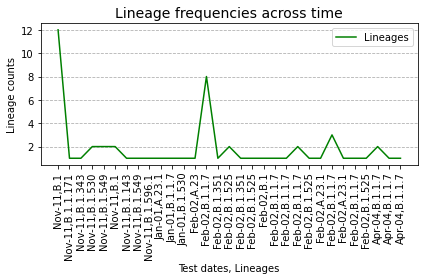

In [304]:
df_lin_grpby_lb_l.plot(label='Lineages', color='green')
# ax.set_xticks(ticks)
# xtics = plt.xticks()
plt.xticks(np.arange(len(ticks)), labels=labels, rotation=90)
plt.xlabel('Test dates, Lineages')
plt.legend(['Lineages'])
fontdict = {'fontsize': 14,
        'fontweight': 3,
        'color': 'k'}
plt.title('Lineage frequencies across time', fontdict=fontdict)
plt.ylabel('Lineage counts')
plt.grid(axis='y', ls='--')
plt.tight_layout()
plt.savefig('/home/douso/Documents/TrendData/plots/trend-analysis2-P002.png', dpi=500)
# plt.xticks(ticks=t, labels=l, rotation=90)

In [338]:
print(len(np.array(df_lin_grpby_lb_l['Sequence_name'])))
print(np.array(df_lin_grpby_lb_l['Sequence_name']))
print(len(np.linspace(start.value, end.value, 31)))
print(np.array(pd.to_datetime(np.linspace(start.value, end.value, 31))))
print(len(x))
print(x)
print(ticks[0], ticks[-1])
print(t[0], t[-1])

31
[12  1  1  2  2  2  1  1  1  1  1  1  1  8  1  2  1  1  1  1  1  2  1  1
  3  1  1  1  2  1  1]
31
['2020-11-13T00:00:00.000000000' '2020-11-17T20:48:00.000000000'
 '2020-11-22T17:36:00.000000000' '2020-11-27T14:24:00.000000000'
 '2020-12-02T11:12:00.000000000' '2020-12-07T08:00:00.000000000'
 '2020-12-12T04:48:00.000000000' '2020-12-17T01:36:00.000000000'
 '2020-12-21T22:24:00.000000000' '2020-12-26T19:12:00.000000000'
 '2020-12-31T16:00:00.000000000' '2021-01-05T12:48:00.000000000'
 '2021-01-10T09:36:00.000000000' '2021-01-15T06:24:00.000000000'
 '2021-01-20T03:12:00.000000000' '2021-01-25T00:00:00.000000000'
 '2021-01-29T20:48:00.000000000' '2021-02-03T17:36:00.000000000'
 '2021-02-08T14:24:00.000000000' '2021-02-13T11:12:00.000000000'
 '2021-02-18T08:00:00.000000000' '2021-02-23T04:48:00.000000000'
 '2021-02-28T01:36:00.000000000' '2021-03-04T22:24:00.000000000'
 '2021-03-09T19:12:00.000000000' '2021-03-14T16:00:00.000000000'
 '2021-03-19T12:48:00.000000000' '2021-03-24T09:36:00

In [345]:
len(np.array(df_lin_grpby_lb_l['Sequence_name']))

31

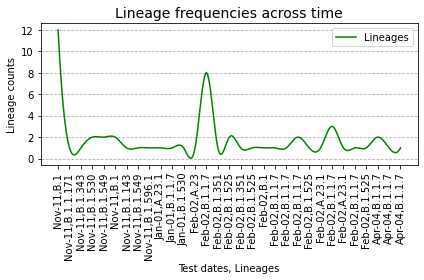

In [354]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Dataset
x=np.arange(len(ticks))
y=np.array(df_lin_grpby_lb_l['Sequence_name'])

start = ticks[0]
end = ticks[-1]

t = np.linspace(start.value, end.value, 31)

cubic_interploation_model = interp1d(t, y, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(t.min(), t.max(), 1000)
Y_=cubic_interploation_model(X_)
 

plt.plot(X_, Y_, label='Lineages', color='green')
plt.xticks(t, labels=labels, rotation=90)
plt.xlabel('Test dates, Lineages')
plt.legend(['Lineages'])
plt.ylabel('Lineage counts')
fontdict = {'fontsize': 14,
        'fontweight': 3,
        'color': 'k'}
plt.title('Lineage frequencies across time', fontdict=fontdict)
plt.grid(axis='y', ls='--')
plt.tight_layout()
plt.savefig('/home/douso/Documents/TrendData/plots/trend-analysis-smooth-P002.png', dpi=500)
plt.show()


In [ ]:
df_lin_grpby2 = df_lin_ts2.groupby('Lineage').count()
df_lin_grpby2

In [ ]:
df_lin_grpby.resample('Lineage', 'W').count()